In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('2022 Fuel Consumption Ratings.csv')
df.shape


(946, 15)

In [30]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In recent years, the number of cars used by families and individuals has increased. But the fuel consumption of different models of different brands is different, so judging which type of car to buy is the most economical has become a market issue. This project will combine model-specific fuel consumption ratings, and estimated CO2 emissions of new light-duty vehicles retailing in Canada in 2022 to understand how to judge whether buying a car will be fuel efficient and reduce CO2 emissions.

In [31]:
df['Make'].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [34]:
df.describe(include = object)

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,946,946,946,946,946
unique,39,715,14,23,4
top,Ford,Silverado 4WD Mud Terrain Tire,SUV: Small,AS8,Z
freq,89,5,197,212,458


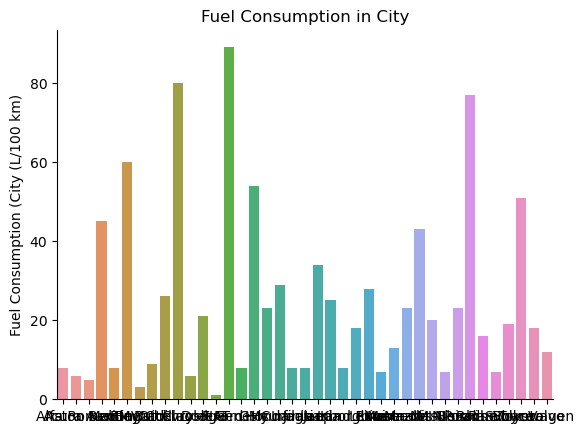

In [32]:
sns.countplot(data=df,
              x='Make')
plt.xlabel('')
plt.ylabel('Fuel Consumption (City (L/100 km)')
plt.title('Fuel Consumption in City')
sns.despine()
plt.show()

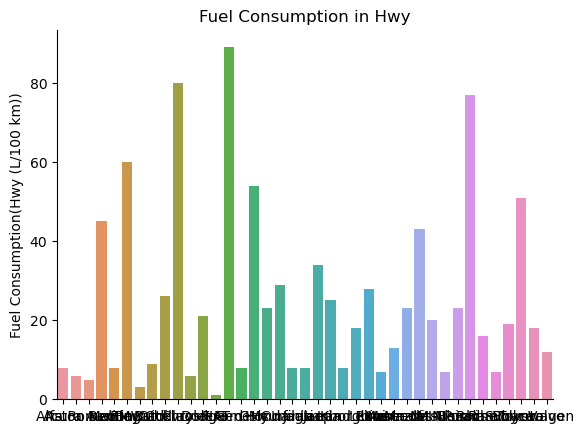

In [39]:
sns.countplot(data=df,
              x='Make')
plt.xlabel('')
plt.ylabel('Fuel Consumption(Hwy (L/100 km))')
plt.title('Fuel Consumption in Hwy')
sns.despine()
plt.show()

Through these overall data, we can't see which brands and models of cars can bring good fuel benefits and environmental protection (carbon dioxide emissions). So next, I will combine the relationship between the car brand and fuel and carbon dioxide emissions, as well as the relationship between different brands of models and fuel and carbon dioxide for data visualization. See if this is more intuitive.

In [37]:
df_cat_features = df.select_dtypes(include='object')
df_cat_features1 = df_cat_features[['Vehicle Class', 'Transmission', 'Fuel Type', 'Model','Make']]

Top 5 car makes out of total {df.Model.nunique()} car makes
------------------------------  -
Silverado 4WD Mud Terrain Tire  5
Silverado 4WD                   5
Sierra 4WD Mud Terrain Tire     5
Mustang                         5
Sierra 4WD                      5
------------------------------  -


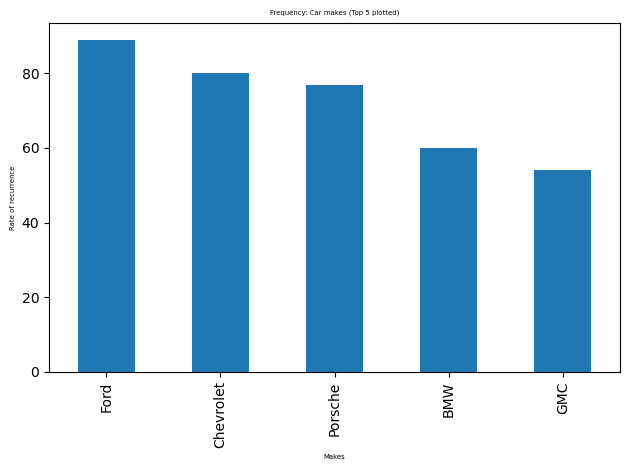

In [66]:
print("Top 5 car makes out of total {df.Model.nunique()} car makes")
print(tabulate(pd.DataFrame(df.Model.value_counts().sort_values(ascending=False)[:5])))
df.groupby("Make")["Make"].count().sort_values(ascending=False)[:5].plot(kind="bar")
plt.title("Frequency: Car makes (Top 5 plotted)", fontsize=5)
plt.ylabel("Rate of recurrence", fontsize=5)
plt.xlabel("Makes", fontsize=5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

By proposing the top five car brands, it can be seen that the five most frequently used brands by Canadians in 2022 are: Ford, Chevrolet, Porsche, BMW and GMC. However, through this data, we still cannot conduct accurate analysis and make conclusions to recommend people who have not bought a car to make a choice.

Text(0, 0.5, 'Fuel Consumption(Comb (mpg))')

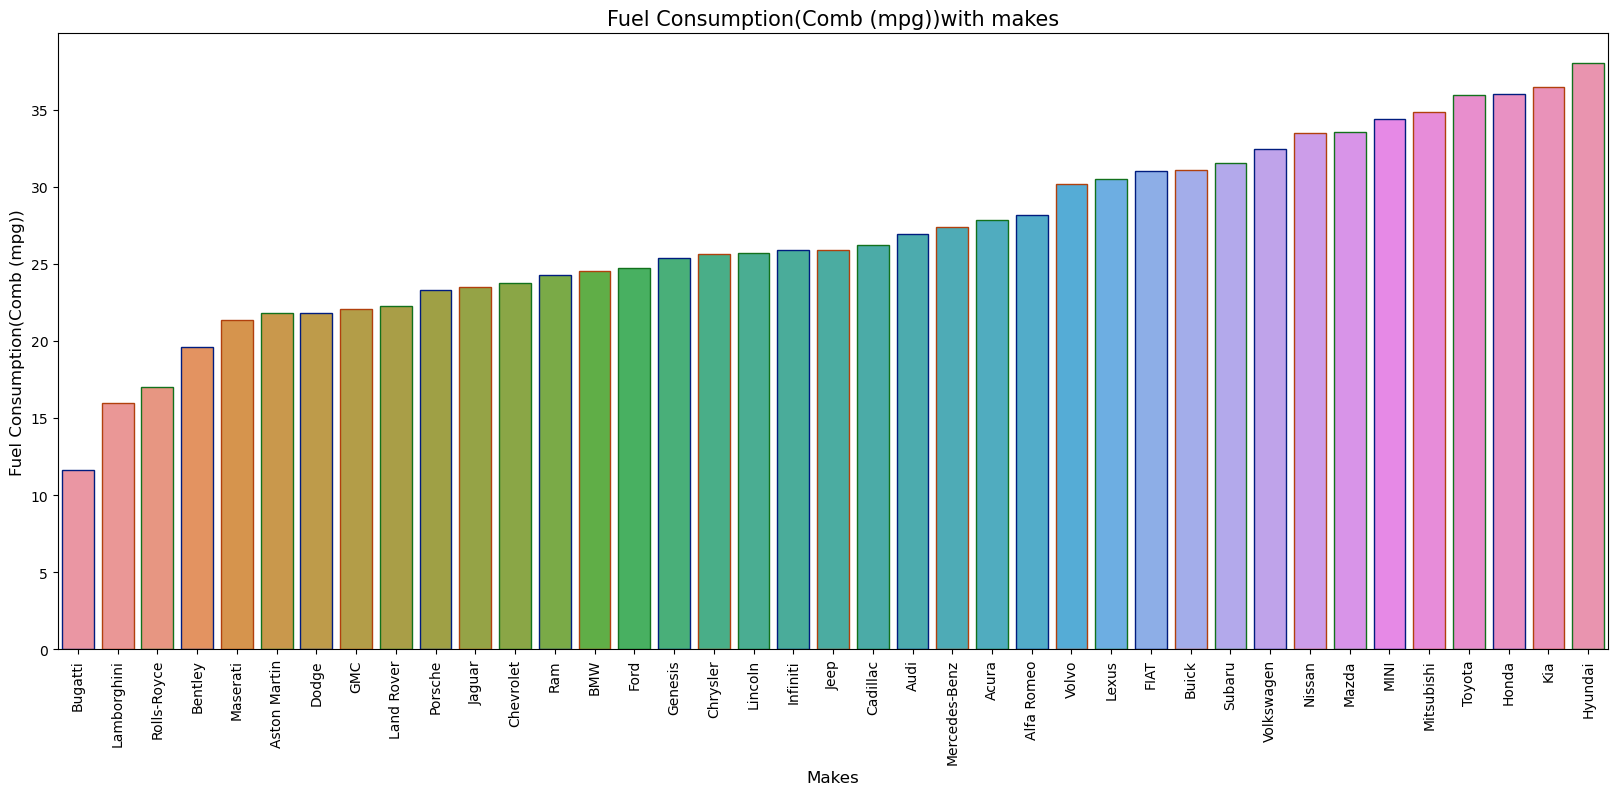

In [86]:
mpg = df.groupby(['Make'])['Fuel Consumption(Comb (mpg))'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Make",y="Fuel Consumption(Comb (mpg))",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption(Comb (mpg))with makes', fontsize=15)
plt.xlabel('Makes', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('Fuel Consumption(Comb (mpg))', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

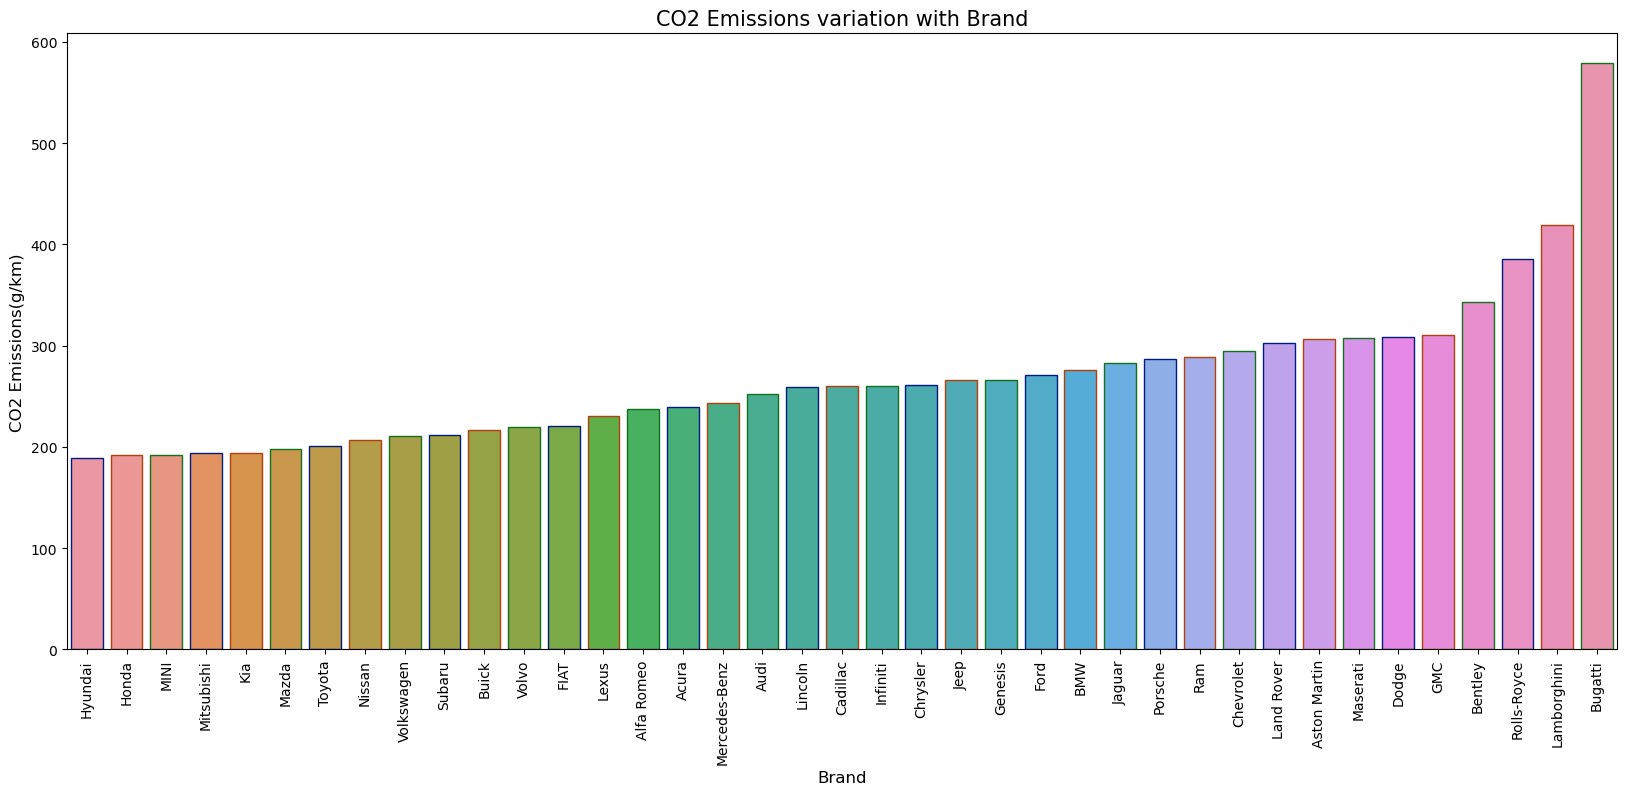

In [88]:
CO2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Make",y="CO2 Emissions(g/km)",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

The data shows that the Hyundai brand is higher than other brands in terms of overall carbon dioxide emissions and fuel economy efficiency. And the top three cars of the Hyundai brand in terms of fuel efficiency are: IONIQ Blue (mpg: 71), IONIQ (mpg: 67) and Elantra Hybrid (mpg: 64).
Conclusion: If you use the data report on Canadian car fuel consumption ratings in 2022 to make suggestions to customers who are about to buy a car, choose IONIQ Blue (mpg: 71), IONIQ (mpg: 67) and Elantra Hybrid (mpg: 64 ) of these three models. Because these three models have the most fuel economy and environmental efficiency.